In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

In [342]:
from emnist import extract_test_samples
images, labels = extract_test_samples('balanced')

In [669]:
class Make_words:
    def __init__(self, vocab, images, words):
        self.vocab = vocab
        self.images = images
        self.words = words
    
    def make_words(self):
        word = self.words[np.random.randint(len(self.words))]
        letters = []
        for c in word:
            letters.append(self.images[self.vocab[c]][np.random.randint(len(self.images[self.vocab[c]]))])
        img_word = np.array([[[255, 255, 255] for j in range(28*len(letters)+24)] for i in range(28+8)])
        nxt_pix = 0
        for ind, letter in enumerate(letters):
            vert_move = np.random.randint(9)-4
            hor_move = np.random.randint(4)-10
            for i in range(len(letter)):
                for j in range(len(letter[0])):
                    if letter[i][j] <= 244:
                        for h in range(3):
                            img_word[4+vert_move+i, 10+nxt_pix+28*ind+hor_move+j][h] = letter[i][j]
            nxt_pix += hor_move
        
        del_vert = []
        for j in range(28*len(letters)+24-1, -1, -1):
            is_white = True
            for i in range(28+8):
                if img_word[i][j][0] != 255 or img_word[i][j][1] != 255 or img_word[i][j][2] != 255:
                    is_white = False
                    break
            if is_white:
                del_vert.append(j)
            else:
                break
        
        for i in range(4):
            del_vert.pop()
        img_word = np.delete(img_word, del_vert, 1)
        
        mns_white = np.random.randint(44)
        pls_black = np.random.randint(144)
        for i in range(len(img_word)):
            for j in range(len(img_word[0])):
                if img_word[i][j][0] == 255 and img_word[i][j][1] == 255 and img_word[i][j][2] == 255:
                    img_word[i][j] = [255-mns_white, 255-mns_white, 255-mns_white]
                elif img_word[i][j][0] <= 44 and img_word[i][j][1] <= 44 and img_word[i][j][2] <= 44:
                    img_word[i][j] = [pls_black, pls_black, pls_black]
                img_word[i][j][0] = max(0, min(255, img_word[i][j][0]+np.random.randint(11)-5))
                img_word[i][j][1] = max(0, min(255, img_word[i][j][1]+np.random.randint(11)-5))
                img_word[i][j][2] = max(0, min(255, img_word[i][j][2]+np.random.randint(11)-5))
        
        return img_word

In [353]:
vocab_new = {'0': 0,
             '1': 1,
             '2': 2,
             '3': 3,
             '4': 4,
             '5': 5,
             '6': 6,
             '7': 7,
             '8': 8,
             '9': 9,
             'a': 36,
             'b': 37,
             'c': 12,
             'd': 38,
             'e': 39,
             'f': 40,
             'g': 41,
             'h': 42,
             'i': 18,
             'j': 19,
             'k': 20,
             'l': 21,
             'm': 22,
             'n': 43,
             'o': 24,
             'p': 25,
             'q': 44,
             'r': 45,
             's': 28,
             't': 46,
             'u': 30,
             'v': 31,
             'w': 32,
             'x': 33,
             'y': 34,
             'z': 35,
             'A': 10,
             'B': 11,
             'C': 12,
             'D': 13,
             'E': 14,
             'F': 15,
             'G': 16,
             'H': 17,
             'I': 18,
             'J': 19,
             'K': 20,
             'L': 21,
             'M': 22,
             'N': 23,
             'O': 24,
             'P': 25,
             'Q': 26,
             'R': 27,
             'S': 28,
             'T': 29,
             'U': 30,
             'V': 31,
             'W': 32,
             'X': 33,
             'Y': 34,
             'Z': 35}

In [402]:
def get_images(path_to_folder=''):
    '''with open(path_to_folder + 'V0.3/label.txt') as f:
        alphabet_img = f.read().split('\n')
    vocab = {c: i for i, c in enumerate(alphabet_img)}
    images = [[] for i in range(len(alphabet_img))]
    for i, c in enumerate(alphabet_img):
        for root, dirs, files in os.walk(path_to_folder + 'V0.3/data/' + str(i)):
            for file in files:
                img = cv2.imread(path_to_folder + 'V0.3/data/' + str(i) + '/' + file)
                images[i].append(img)'''
    
    imgs = [[] for i in range(47)]
    for ind in range(len(labels)):
        imgs[labels[ind]].append(255-images[ind])
    
    return vocab_new, imgs

In [48]:
def get_words(path_to_folder=''):
    with open(path_to_folder + 'texts.txt') as f:
        words = f.read().split()
    return words

In [403]:
vocab_new, imgs = get_images()

In [404]:
words = get_words()

In [670]:
creator = Make_words(vocab_new, imgs, words)

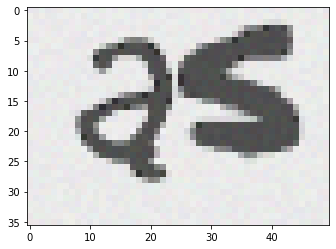

In [682]:
#for i in range(100):
img = creator.make_words()
plt.imshow(img)
plt.show()